In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras import layers
from keras.applications import inception_v3

In [ ]:
cataract = ImageDataGenerator(rescale = 1./255,
                                 shear_range = 0.2,
                                  zoom_range = 0.2,
                                horizontal_flip = True,vertical_flip=True)

In [ ]:
train_data = cataract.flow_from_directory(directory = '/content/drive/My Drive/DATA/train',target_size=(224,224))

Found 2508 images belonging to 2 classes.


In [ ]:
cataract = ImageDataGenerator(rescale = 1./255)
test_data = cataract.flow_from_directory(directory = '/content/drive/My Drive/DATA/test',target_size=(224,224))

Found 568 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
inception = inception_v3.InceptionV3(
    weights='imagenet', 
    include_top=False,  
    input_shape=(224,224,3)
)
# The Convolutional Neural Network is instantiated using the pre-trained ImageNet weights

In [ ]:
model = Sequential()
model.add(inception)
model.add(Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(Dense(128, activation='sigmoid'))
model.add(layers.Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(Flatten())
model.add(Dense(2,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
dense_12 (Dense)             (None, 5, 5, 256)         524544    
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 256)         0         
_________________________________________________________________
dense_13 (Dense)             (None, 5, 5, 128)         32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
dense_14 (Dense)             (None, 5, 5, 128)         16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 5, 128)        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_inception=model.fit_generator(train_data,validation_data=test_data,epochs=30)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
79/79 [==============================] - 73s 623ms/step - loss: 0.5284 - accuracy: 0.7360 - val_loss: 1.3656 - val_accuracy: 0.5264
Epoch 2/30
79/79 [==============================] - 40s 507ms/step - loss: 0.3418 - accuracy: 0.8739 - val_loss: 0.8042 - val_accuracy: 0.5581
Epoch 3/30
79/79 [==============================] - 41s 523ms/step - loss: 0.3543 - accuracy: 0.8722 - val_loss: 0.5367 - val_accuracy: 0.7905
Epoch 4/30
79/79 [==============================] - 41s 521ms/step - loss: 0.3163 - accuracy: 0.8811 - val_loss: 0.7042 - val_accuracy: 0.4754
Epoch 5/30
79/79 [==============================] - 41s 516ms/step - loss: 0.3080 - accuracy: 0.8749 - val_loss: 0.3663 - val_accuracy: 0.8415
Epoch 6/30
79/79 [==============================] - 41s 517ms/step - loss: 0.2698 - accuracy: 0.9024 - val_loss: 0.3459 - val_accuracy: 0.8785
Epoch 7/30
79/79 [==============================] - 41s 521ms/step - loss: 0.2689 - accuracy: 0.9013 - val_loss: 0.4302 - val_accuracy: 0.8204

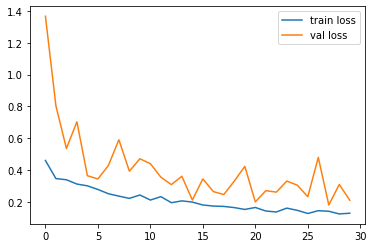

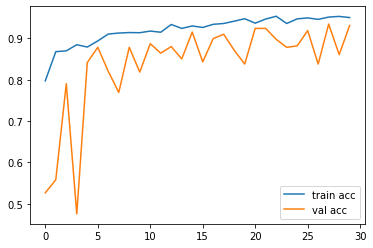

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history_inception.history['loss'], label='train loss')
plt.plot(history_inception.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history_inception.history['accuracy'], label='train acc')
plt.plot(history_inception.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
DATADIR_test="/content/drive/My Drive/DATA/test"
CATEGORIES=["cataract","normal"]

In [ ]:
import os
import cv2
from tqdm import tqdm

In [ ]:
testing_data=[]

def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR_test,category) # paths to covid and normal dir
    class_num = CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array =cv2.resize(img_array, (224,224))
        new_array=new_array*(1.0/255)
        testing_data.append([new_array,class_num])
      except Exception as e:
        print(e)

create_testing_data()

100%|██████████| 284/284 [00:00<00:00, 329.95it/s]


In [ ]:
y_pred=[]
y_actual=[]
for data in tqdm(testing_data):
  y_actual.append(data[1])
  y_pred.append(model.predict_classes(data[0].reshape(1,224,224,3))[0])

  0%|          | 0/568 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
100%|██████████| 568/568 [00:53<00:00, 10.68it/s]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_actual,y_pred)

0.9366197183098591

In [ ]:
print(classification_report(y_pred,y_actual))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       278
           1       0.95      0.93      0.94       290

    accuracy                           0.94       568
   macro avg       0.94      0.94      0.94       568
weighted avg       0.94      0.94      0.94       568



In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

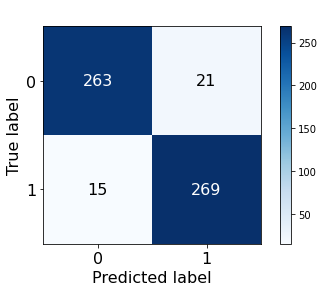

In [ ]:
skplt.metrics.plot_confusion_matrix(
    y_actual, 
    y_pred,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' '
    )